In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
housing=pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
shuffled_housing_pd=housing.sample(n=len(housing),random_state=1)
shuffled_housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [11]:
housing_na=shuffled_housing_pd.dropna(subset=["total_bedrooms"])
len(housing_na)

20433

In [12]:
dummies=pd.get_dummies(housing_na.ocean_proximity)
dummies.head()
housing_na_dummies = pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()
housing_clean = housing_na_dummies.drop('ocean_proximity', axis='columns')
housing_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


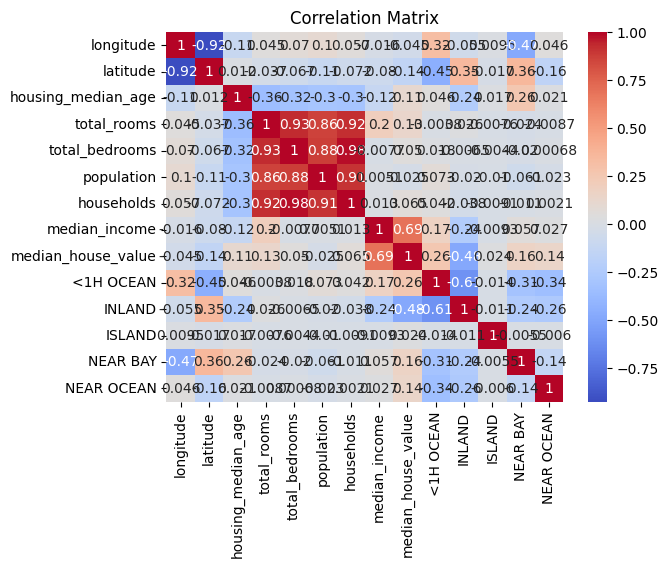

In [17]:
correlation_matrix = housing_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
housing_clean=housing_clean[['longitude',	'latitude',	'housing_median_age',
                               'total_rooms',	'total_bedrooms',	'population',
                               'households',	'median_income',
                               	'<1H OCEAN',	'INLAND','ISLAND',
                               	'NEAR BAY',	'NEAR OCEAN',
                               'median_house_value']]
housing_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [19]:
X=housing_clean.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False


In [20]:
y=housing_clean['median_house_value']
y.head()

4712     355000.0
2151      70700.0
15927    229400.0
82       112500.0
8161     225400.0
Name: median_house_value, dtype: float64

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2196,-119.91,36.83,29.0,2205.0,366.0,1072.0,345.0,3.8056,False,True,False,False,False
18993,-122.07,38.41,17.0,3053.0,595.0,1434.0,557.0,3.4741,False,True,False,False,False
16322,-121.31,37.99,15.0,3103.0,965.0,3061.0,861.0,1.3729,False,True,False,False,False
12860,-121.37,38.70,18.0,3938.0,649.0,1861.0,606.0,3.6484,False,True,False,False,False
4492,-118.22,34.06,52.0,48.0,6.0,41.0,10.0,10.2264,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,-119.06,34.35,34.0,2426.0,646.0,2116.0,631.0,2.0682,True,False,False,False,False
3338,-122.55,38.81,7.0,3639.0,637.0,1027.0,421.0,3.8831,False,True,False,False,False
7787,-118.06,33.90,37.0,1161.0,254.0,882.0,236.0,4.4167,True,False,False,False,False
10981,-117.84,33.76,26.0,2110.0,409.0,1146.0,407.0,4.3698,True,False,False,False,False


In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
X_train

array([[-0.17350197,  0.5656391 ,  0.03184993, ..., -0.01806632,
        -0.35031359, -0.38821337],
       [-1.25058281,  1.30564505, -0.91877823, ..., -0.01806632,
        -0.35031359, -0.38821337],
       [-0.87160992,  1.10893461, -1.07721625, ..., -0.01806632,
        -0.35031359, -0.38821337],
       ...,
       [ 0.74899783, -0.80665041,  0.66560204, ..., -0.01806632,
        -0.35031359, -0.38821337],
       [ 0.85870051, -0.87222055, -0.20580711, ..., -0.01806632,
        -0.35031359, -0.38821337],
       [ 0.59441678, -0.76918175,  0.82404006, ..., -0.01806632,
        -0.35031359, -0.38821337]])

In [195]:
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'euclidean')

knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean')

In [196]:
y_pred=knn.predict(X_test)

In [197]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3557098831.5156083


In [198]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7352393136902337


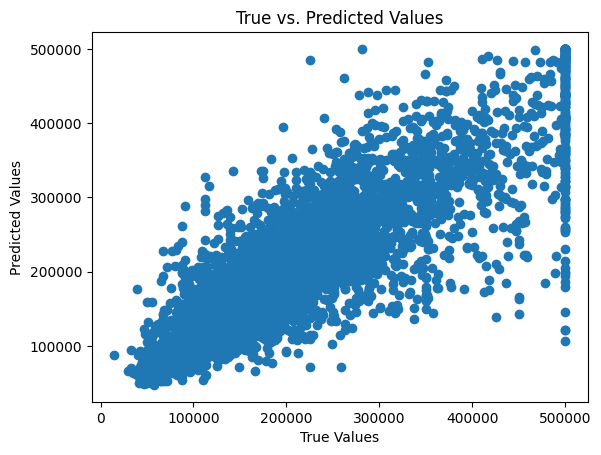

In [194]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()